# ECO225: Data Tools for Economists
## Week 3 - Data Cleaning & Wrangling

**Course:** ECO225 - Data Tools for Economists  
**Instructor:** Professor Nicholas Zammit  
**Tutorial Leader:** Saurabh Nair  

---

### Learning Objectives
By the end of this lab, you will be able to:
- Handle missing values in datasets
- Merge multiple datasets using pandas
- Create derived variables from existing data
- Calculate growth rates and economic indicators

---

## Part 1: Setup and Create Sample Data

This week we'll work with multiple datasets that need to be merged together.

In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [66]:
# Create sample GDP data

years = list(range(2015, 2021))
countries = ['Canada', 'Mexico', 'USA']

gdp_data = pd.DataFrame({
    'Country': countries * len(years),
    'Year': sorted(years * len(countries)),
    'GDP_billions': [1550, 1200, 18200, 1600, 1100, 18700, 1650, 1150, 19500,
                     1700, 1200, 20500, 1650, 1100, 20900, 1700, 1050, 21400]
})

print("GDP Data:")
print(gdp_data)
print(gdp_data.head(5))

GDP Data:
   Country  Year  GDP_billions
0   Canada  2015          1550
1   Mexico  2015          1200
2      USA  2015         18200
3   Canada  2016          1600
4   Mexico  2016          1100
5      USA  2016         18700
6   Canada  2017          1650
7   Mexico  2017          1150
8      USA  2017         19500
9   Canada  2018          1700
10  Mexico  2018          1200
11     USA  2018         20500
12  Canada  2019          1650
13  Mexico  2019          1100
14     USA  2019         20900
15  Canada  2020          1700
16  Mexico  2020          1050
17     USA  2020         21400
  Country  Year  GDP_billions
0  Canada  2015          1550
1  Mexico  2015          1200
2     USA  2015         18200
3  Canada  2016          1600
4  Mexico  2016          1100


In [67]:
# Create sample population data (with a missing value)
pop_data = pd.DataFrame({
    'Country': countries * len(years),
    'Year': sorted(years * len(countries)),
    'Population_millions': [35.7, 127.0, 321.0, 36.0, 128.0, 323.0, 36.3, 129.0, 325.0,
                            36.6, 130.0, 327.0, 37.0, np.nan, 329.0, 37.6, 132.0, 331.0]
})

print("\nPopulation Data:")
print(pop_data)


Population Data:
   Country  Year  Population_millions
0   Canada  2015                 35.7
1   Mexico  2015                127.0
2      USA  2015                321.0
3   Canada  2016                 36.0
4   Mexico  2016                128.0
5      USA  2016                323.0
6   Canada  2017                 36.3
7   Mexico  2017                129.0
8      USA  2017                325.0
9   Canada  2018                 36.6
10  Mexico  2018                130.0
11     USA  2018                327.0
12  Canada  2019                 37.0
13  Mexico  2019                  NaN
14     USA  2019                329.0
15  Canada  2020                 37.6
16  Mexico  2020                132.0
17     USA  2020                331.0


In [68]:
# Create sample inflation data
inflation_data = pd.DataFrame({
    'Country': countries * len(years),
    'Year': sorted(years * len(countries)),
    'Inflation_rate': [1.1, 2.7, 0.1, 1.4, 2.8, 1.3, 1.6, 6.0, 2.1,
                       1.9, 4.8, 1.8, 0.7, 3.4, 1.2, 3.4, 5.7, 4.7]
})

print("\nInflation Data:")
print(inflation_data.head(10))


Inflation Data:
  Country  Year  Inflation_rate
0  Canada  2015             1.1
1  Mexico  2015             2.7
2     USA  2015             0.1
3  Canada  2016             1.4
4  Mexico  2016             2.8
5     USA  2016             1.3
6  Canada  2017             1.6
7  Mexico  2017             6.0
8     USA  2017             2.1
9  Canada  2018             1.9


## Part 2: Checking for Missing Values

Before merging, let's check each dataset for missing values.

In [69]:
# Check for missing values in each dataset
print("Missing values in GDP data:")
print(gdp_data.isnull().sum())
#isnull() is a boolean function that returns true if its null 
# it sums up the the number of nulls for each column
print(gdp_data.isnull())


print("\nMissing values in Population data:")
print(pop_data.isnull().sum())
print(pop_data.isnull())


print("\nMissing values in Inflation data:")
print(inflation_data.isnull().sum())

Missing values in GDP data:
Country         0
Year            0
GDP_billions    0
dtype: int64
    Country   Year  GDP_billions
0     False  False         False
1     False  False         False
2     False  False         False
3     False  False         False
4     False  False         False
5     False  False         False
6     False  False         False
7     False  False         False
8     False  False         False
9     False  False         False
10    False  False         False
11    False  False         False
12    False  False         False
13    False  False         False
14    False  False         False
15    False  False         False
16    False  False         False
17    False  False         False

Missing values in Population data:
Country                0
Year                   0
Population_millions    1
dtype: int64
    Country   Year  Population_millions
0     False  False                False
1     False  False                False
2     False  False                

In [70]:
# Show which rows have missing population data
print("Rows with missing population:")
print(pop_data[pop_data['Population_millions'].isnull()])

Rows with missing population:
   Country  Year  Population_millions
13  Mexico  2019                  NaN


## Part 3: Merging Datasets

Now we'll merge all three datasets into one comprehensive dataset.

In [71]:
# Merge GDP and Population data
df = gdp_data.merge(pop_data, on=['Country', 'Year'], how='inner')
# Outer joins all the rows including rows that do not have intersection, joining rows by filling in with NaN
# https://www.geeksforgeeks.org/python/different-types-of-joins-in-pandas/

#inner means it keeps everything that is common whereas outer 
#keeps everything on the outer and leaves them as null if its doesn't exisit
print("After merging GDP and Population:")
print(df)
print(f"\nShape: {df.shape}")

After merging GDP and Population:
   Country  Year  GDP_billions  Population_millions
0   Canada  2015          1550                 35.7
1   Mexico  2015          1200                127.0
2      USA  2015         18200                321.0
3   Canada  2016          1600                 36.0
4   Mexico  2016          1100                128.0
5      USA  2016         18700                323.0
6   Canada  2017          1650                 36.3
7   Mexico  2017          1150                129.0
8      USA  2017         19500                325.0
9   Canada  2018          1700                 36.6
10  Mexico  2018          1200                130.0
11     USA  2018         20500                327.0
12  Canada  2019          1650                 37.0
13  Mexico  2019          1100                  NaN
14     USA  2019         20900                329.0
15  Canada  2020          1700                 37.6
16  Mexico  2020          1050                132.0
17     USA  2020         21400

In [72]:
# Merge with Inflation data
df = df.merge(inflation_data, on=['Country', 'Year'], how='inner')

print("After merging all three datasets:")
print(df.head(10))
print(f"\nShape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

After merging all three datasets:
  Country  Year  GDP_billions  Population_millions  Inflation_rate
0  Canada  2015          1550                 35.7             1.1
1  Mexico  2015          1200                127.0             2.7
2     USA  2015         18200                321.0             0.1
3  Canada  2016          1600                 36.0             1.4
4  Mexico  2016          1100                128.0             2.8
5     USA  2016         18700                323.0             1.3
6  Canada  2017          1650                 36.3             1.6
7  Mexico  2017          1150                129.0             6.0
8     USA  2017         19500                325.0             2.1
9  Canada  2018          1700                 36.6             1.9

Shape: (18, 5)

Columns: ['Country', 'Year', 'GDP_billions', 'Population_millions', 'Inflation_rate']


## Part 4: Handling Missing Values

We found a missing population value. Let's handle it.

In [73]:
# Check for missing values in merged dataset
print("Missing values in merged dataset:")
print(df.isnull().sum())

Missing values in merged dataset:
Country                0
Year                   0
GDP_billions           0
Population_millions    1
Inflation_rate         0
dtype: int64


In [74]:
# Option 1: Fill missing values with interpolation (linear)
df_filled = df.copy()
df_filled['Population_millions'] = df_filled.groupby('Country')['Population_millions'].transform(
    lambda x: x.interpolate(method='linear')
)
#important to apply interprolate to the specfic country or else it will just
#use the values before and after it, which would be way off
print("After interpolation:")
print(df_filled[df_filled['Country'] == 'Mexico'])
#https://www.geeksforgeeks.org/python/pandas-dataframe-interpolate/

After interpolation:
   Country  Year  GDP_billions  Population_millions  Inflation_rate
1   Mexico  2015          1200                127.0             2.7
4   Mexico  2016          1100                128.0             2.8
7   Mexico  2017          1150                129.0             6.0
10  Mexico  2018          1200                130.0             4.8
13  Mexico  2019          1100                131.0             3.4
16  Mexico  2020          1050                132.0             5.7


In [75]:
# Verify no missing values remain
print("Missing values after filling:")
print(df_filled.isnull().sum())

Missing values after filling:
Country                0
Year                   0
GDP_billions           0
Population_millions    0
Inflation_rate         0
dtype: int64


## Part 5: Creating Derived Variables

Now let's calculate some useful economic indicators.

In [76]:
# Calculate GDP per capita
df_filled['GDP_per_capita'] = (df_filled['GDP_billions'] * 1000) / df_filled['Population_millions']

print("GDP per Capita calculated:")
print(df_filled[['Country', 'Year', 'GDP_per_capita']].head(10))

GDP per Capita calculated:
  Country  Year  GDP_per_capita
0  Canada  2015    43417.366947
1  Mexico  2015     9448.818898
2     USA  2015    56697.819315
3  Canada  2016    44444.444444
4  Mexico  2016     8593.750000
5     USA  2016    57894.736842
6  Canada  2017    45454.545455
7  Mexico  2017     8914.728682
8     USA  2017    60000.000000
9  Canada  2018    46448.087432


In [80]:
# Calculate year-over-year GDP growth
df_filled['GDP_growth'] = df_filled.groupby('Country')['GDP_billions'].pct_change() * 100

print("\nGDP Growth calculated:")
print(df_filled[['Country', 'Year', 'GDP_billions', 'GDP_growth']].head(12))


GDP Growth calculated:
   Country  Year  GDP_billions  GDP_growth
0   Canada  2015          1550         NaN
1   Mexico  2015          1200         NaN
2      USA  2015         18200         NaN
3   Canada  2016          1600    3.225806
4   Mexico  2016          1100   -8.333333
5      USA  2016         18700    2.747253
6   Canada  2017          1650    3.125000
7   Mexico  2017          1150    4.545455
8      USA  2017         19500    4.278075
9   Canada  2018          1700    3.030303
10  Mexico  2018          1200    4.347826
11     USA  2018         20500    5.128205


In [78]:
# Calculate GDP per capita growth
df_filled['GDP_per_capita_growth'] = df_filled.groupby('Country')['GDP_per_capita'].pct_change() * 100

# Calculate real GDP growth (nominal growth - inflation)
df_filled['Real_GDP_growth'] = df_filled['GDP_growth'] - df_filled['Inflation_rate']

print("\nAll growth metrics:")
print(df_filled[['Country', 'Year', 'GDP_growth', 'Inflation_rate', 'Real_GDP_growth']].head(12))


All growth metrics:
   Country  Year  GDP_growth  Inflation_rate  Real_GDP_growth
0   Canada  2015         NaN             1.1              NaN
1   Mexico  2015         NaN             2.7              NaN
2      USA  2015         NaN             0.1              NaN
3   Canada  2016    3.225806             1.4         1.825806
4   Mexico  2016   -8.333333             2.8       -11.133333
5      USA  2016    2.747253             1.3         1.447253
6   Canada  2017    3.125000             1.6         1.525000
7   Mexico  2017    4.545455             6.0        -1.454545
8      USA  2017    4.278075             2.1         2.178075
9   Canada  2018    3.030303             1.9         1.130303
10  Mexico  2018    4.347826             4.8        -0.452174
11     USA  2018    5.128205             1.8         3.328205


## Part 6: Analysis Example

Let's find which country had the highest real GDP growth.

In [52]:
# Find highest real GDP growth in 2019
df_2019 = df_filled[df_filled['Year'] == 2019]

print("Real GDP Growth in 2019:")
print(df_2019[['Country', 'Real_GDP_growth']].sort_values('Real_GDP_growth', ascending=False))

# Find the country with highest growth
best_country = df_2019.loc[df_2019['Real_GDP_growth'].idxmax(), 'Country']
best_growth = df_2019['Real_GDP_growth'].max()

print(f"\n{best_country} had the highest real GDP growth in 2019: {best_growth:.2f}%")

Real GDP Growth in 2019:
   Country  Real_GDP_growth
14     USA         0.751220
12  Canada        -3.641176
13  Mexico       -11.733333

USA had the highest real GDP growth in 2019: 0.75%



Now you'll practice data cleaning and wrangling with unemployment data.

### Task 1: Create and Merge Unemployment Data (25 points)

In [85]:
# TODO: Create unemployment data
# Create a DataFrame with Country, Year, and Unemployment_rate columns
# Use the same countries and years as above
# Include at least ONE missing value (use np.nan)

years = list(range(2015, 2021)) 
countries = ['Canada', 'Mexico', 'USA']

unemployment_data_nomissing = pd.DataFrame({
    'Country': countries * len(years),
    'Year': sorted(years * len(countries)),
    'Unemployment_rate': [6.9, 5.3, 4.3, 7.0, 4.9, 3.9, 6.4, 4.4, 3.4,
                     5.8, 3.9, 3.3, 5.7, 3.7, 3.5, 9.7, 8.1, 4.4]
}) #includes 2015, does not include 2021


print("Unemployment Data (without missing value):")
print(unemployment_data_nomissing)


unemployment_data_missing = pd.DataFrame({
    'Country': countries * len(years),
    'Year': sorted(years * len(countries)),
    'Unemployment_rate': [6.9, 5.3, 4.3, 7.0, 4.9, 3.9, 6.4, 4.4, 3.4,
                     5.8, 3.9, 3.3, 5.7, 3.7, 3.5, 9.7, np.nan, 4.4]
}) #includes 2015, does not include 2021

print("\nUnemployment Data (with missing value):")
print(unemployment_data_missing)





Unemployment Data (without missing value):
   Country  Year  Unemployment_rate
0   Canada  2015                6.9
1   Mexico  2015                5.3
2      USA  2015                4.3
3   Canada  2016                7.0
4   Mexico  2016                4.9
5      USA  2016                3.9
6   Canada  2017                6.4
7   Mexico  2017                4.4
8      USA  2017                3.4
9   Canada  2018                5.8
10  Mexico  2018                3.9
11     USA  2018                3.3
12  Canada  2019                5.7
13  Mexico  2019                3.7
14     USA  2019                3.5
15  Canada  2020                9.7
16  Mexico  2020                8.1
17     USA  2020                4.4

Unemployment Data (with missing value):
   Country  Year  Unemployment_rate
0   Canada  2015                6.9
1   Mexico  2015                5.3
2      USA  2015                4.3
3   Canada  2016                7.0
4   Mexico  2016                4.9
5      USA  2016

In [86]:
# TODO: Check for missing values
# print("Missing values in unemployment data:")
# YOUR CODE HERE

# Check for missing values in each dataset
print("Missing values in unemployment data:")
print(unemployment_data_missing.isnull().sum())


#isnull() is a boolean function that returns true if its null 
# it sums up the the number of nulls for each column
print(unemployment_data_missing.isnull()) # true value is missing




Missing values in unemployment data:
Country              0
Year                 0
Unemployment_rate    1
dtype: int64
    Country   Year  Unemployment_rate
0     False  False              False
1     False  False              False
2     False  False              False
3     False  False              False
4     False  False              False
5     False  False              False
6     False  False              False
7     False  False              False
8     False  False              False
9     False  False              False
10    False  False              False
11    False  False              False
12    False  False              False
13    False  False              False
14    False  False              False
15    False  False              False
16    False  False               True
17    False  False              False


In [87]:
# TODO: Merge unemployment data with df_filled
df_complete = unemployment_data_missing.merge(df_filled, on=['Country', 'Year'], how='inner')

print("\nMerged dataset shape:", df_complete.shape)
print("\nFirst 10 rows:")
print(df_complete.head(10))



Merged dataset shape: (18, 10)

First 10 rows:
  Country  Year  Unemployment_rate  GDP_billions  Population_millions  \
0  Canada  2015                6.9          1550                 35.7   
1  Mexico  2015                5.3          1200                127.0   
2     USA  2015                4.3         18200                321.0   
3  Canada  2016                7.0          1600                 36.0   
4  Mexico  2016                4.9          1100                128.0   
5     USA  2016                3.9         18700                323.0   
6  Canada  2017                6.4          1650                 36.3   
7  Mexico  2017                4.4          1150                129.0   
8     USA  2017                3.4         19500                325.0   
9  Canada  2018                5.8          1700                 36.6   

   Inflation_rate  GDP_per_capita  GDP_growth  GDP_per_capita_growth  \
0             1.1    43417.366947         NaN                    NaN   
1   

### Task 2: Handle Missing Values (20 points)

Choose and implement ONE of these strategies:
- Forward fill (use the previous year's value)
- Interpolate linearly
- Fill with country-specific mean

Document your choice and reasoning.

In [91]:
# TODO: Handle missing unemployment values
# State your chosen method in a comment

# Method chosen: Interpolate linearly, the one I feel most confomrtable with

# YOUR CODE HERE



df_complete['Unemployment_rate'] = df_complete.groupby('Country')['Unemployment_rate'].transform(
    lambda x: x.interpolate(method='linear')
)

print("After interpolation:")
print(df_filled[df_filled['Country'] == 'Mexico'])



# Verify no missing values
print("\nMissing values after filling:")
print(df_complete.isnull().sum())
#none missing in unemployment







After interpolation:
   Country  Year  GDP_billions  Population_millions  Inflation_rate  \
1   Mexico  2015          1200                127.0             2.7   
4   Mexico  2016          1100                128.0             2.8   
7   Mexico  2017          1150                129.0             6.0   
10  Mexico  2018          1200                130.0             4.8   
13  Mexico  2019          1100                131.0             3.4   
16  Mexico  2020          1050                132.0             5.7   

    GDP_per_capita  GDP_growth  GDP_per_capita_growth  Real_GDP_growth  
1      9448.818898         NaN                    NaN              NaN  
4      8593.750000   -8.333333              -9.049479       -11.133333  
7      8914.728682    4.545455               3.735025        -1.454545  
10     9230.769231    4.347826               3.545151        -0.452174  
13     8396.946565   -8.333333              -9.033079       -11.733333  
16     7954.545455   -4.545455             

### Task 3: Create the Misery Index (25 points)

The "Misery Index" is a simple economic indicator = Unemployment Rate + Inflation Rate

In [92]:
# TODO: Create Misery Index column
df_complete['Misery_Index'] = (df_complete['Unemployment_rate']+df_complete['Inflation_rate'])

print("Misery Index calculated:")
print(df_complete[['Country', 'Year', 'Unemployment_rate', 'Inflation_rate', 'Misery_Index']].head(10))

Misery Index calculated:
  Country  Year  Unemployment_rate  Inflation_rate  Misery_Index
0  Canada  2015                6.9             1.1           8.0
1  Mexico  2015                5.3             2.7           8.0
2     USA  2015                4.3             0.1           4.4
3  Canada  2016                7.0             1.4           8.4
4  Mexico  2016                4.9             2.8           7.7
5     USA  2016                3.9             1.3           5.2
6  Canada  2017                6.4             1.6           8.0
7  Mexico  2017                4.4             6.0          10.4
8     USA  2017                3.4             2.1           5.5
9  Canada  2018                5.8             1.9           7.7


In [105]:
# TODO: Find which country-year combination had the HIGHEST misery index

worst_misery_idx = df_complete.loc[df_complete['Misery_Index'].idxmax(), 'Country']

worst_row = df_complete.loc[df_complete['Misery_Index'].idxmax()]

print("Highest Misery Index:")
print(worst_row[['Country', 'Year', 'Misery_Index']])





Highest Misery Index:
Country         Canada
Year              2020
Misery_Index      13.1
Name: 15, dtype: object


### Task 4: Summary Statistics by Country (15 points)

In [107]:
# TODO: Calculate average misery index by country
avg_misery = df_complete.groupby('Country')['Misery_Index'].mean()


print("Average Misery Index by Country:")
print(avg_misery)

print(df_complete[df_complete['Country'] == 'Mexico'])


Average Misery Index by Country:
Country
Canada    8.600000
Mexico    8.550000
USA       5.666667
Name: Misery_Index, dtype: float64
   Country  Year  Unemployment_rate  GDP_billions  Population_millions  \
1   Mexico  2015                5.3          1200                127.0   
4   Mexico  2016                4.9          1100                128.0   
7   Mexico  2017                4.4          1150                129.0   
10  Mexico  2018                3.9          1200                130.0   
13  Mexico  2019                3.7          1100                131.0   
16  Mexico  2020                3.7          1050                132.0   

    Inflation_rate  GDP_per_capita  GDP_growth  GDP_per_capita_growth  \
1              2.7     9448.818898         NaN                    NaN   
4              2.8     8593.750000   -8.333333              -9.049479   
7              6.0     8914.728682    4.545455               3.735025   
10             4.8     9230.769231    4.347826          

### Task 5: Visualization (15 points)

Create a bar chart showing average misery index by country.

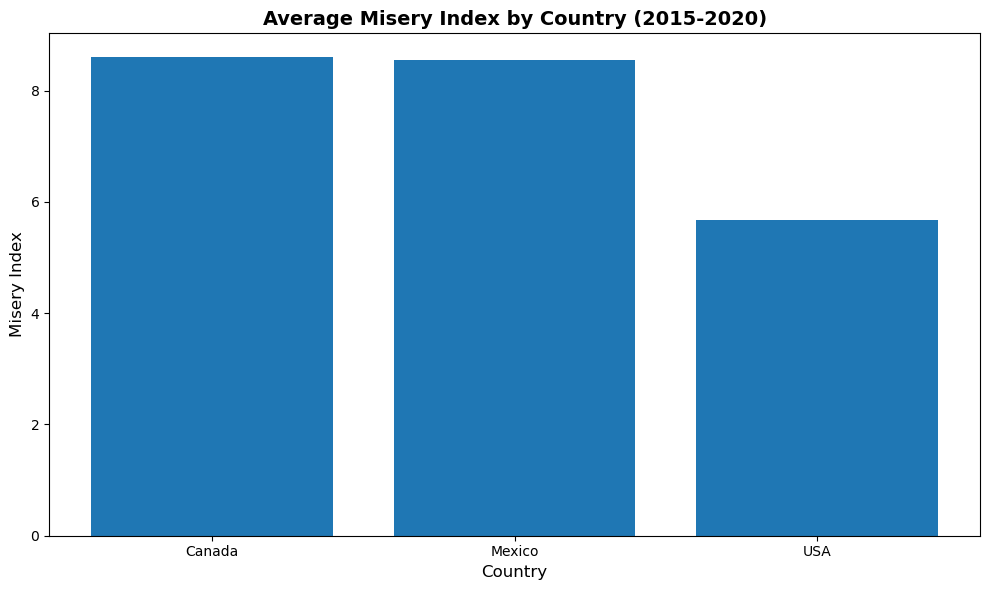

In [98]:
# TODO: Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(avg_misery.index, avg_misery.values)

ax.set_title('Average Misery Index by Country (2015-2020)', fontsize=14, fontweight='bold')
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Misery Index', fontsize=12)

plt.tight_layout()
plt.show()

### Task 6: Bonus - Time Series of Misery Index (10 points)

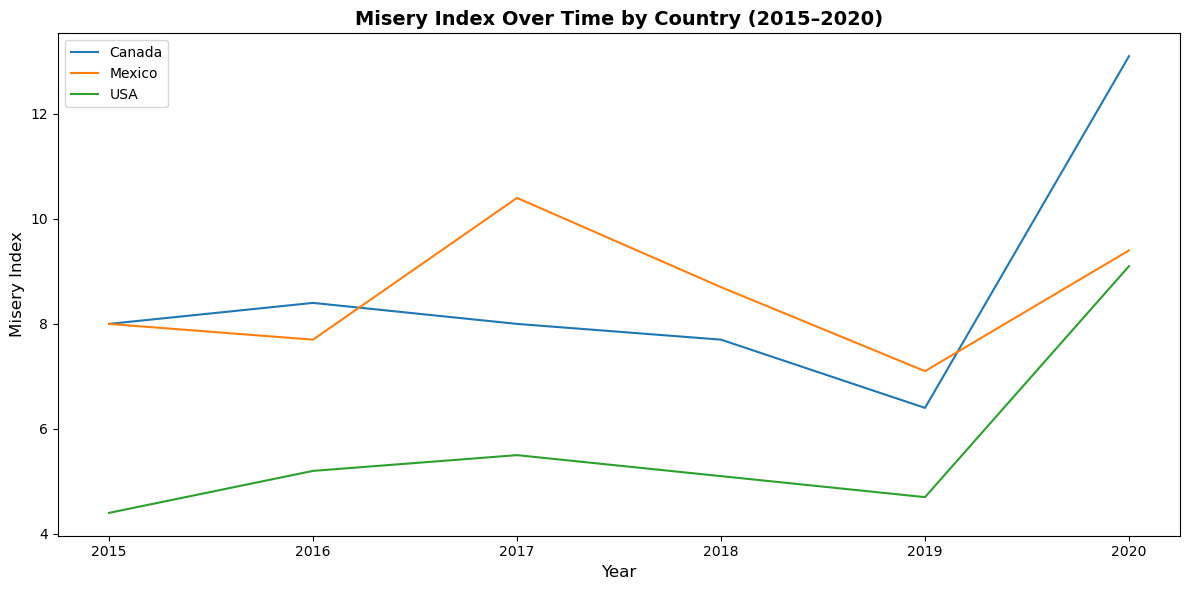

In [108]:
# BONUS: Create a line plot showing misery index over time for all countries
fig, ax = plt.subplots(figsize=(12, 6))

# YOUR CODE HERE
# Plot misery index for each country with different colors
# I'LL TRY IT NEXT TIME

plt.tight_layout()
plt.show()

### Task 7: Interpretation (10 points)

Answer the following questions:

**Questions:**

1. Which country had the lowest average misery index? What might explain this?

Overall, the USA had the lowest average misrey index and this is likely explained by USA constantly having low unemployment and decently low inflation compared to countries like canada who had relatively higher inflation but somewhat similair (albeit, slightly lower) inflation

2. Did you notice any trends in the misery index over time? Which years were worst?
the misrey index tended to be somewhat stable pre pandemic (although canada did see a sligth decline in this period), however, it heavily increased in 2020, aligning with the COVID-19 Pandemic. 2020 was the highest years for both Canada and mexico, however, although it went up in mexico in 2020, 2018 was still had a higher misrey index since it had less of a spike in unemployment rate when the pandemic hit


3. Why might the misery index be a useful (or not useful) economic indicator?

Misrey index is useful in that it covers two things that directly effect welfare of people and they cover the two overaching area most centeral banks look to and try and keep at certain levels (unemployment and inflation). Centeral banks use unemployment and inflation data to influence their decisions on interest rates and whether a hike or a decrease is warnted showing how useful of an economic indictor it is.



---
## Summary

In this lab, you learned:
- How to identify and handle missing values
- How to merge multiple datasets using common keys
- How to create derived variables from existing data
- How to calculate growth rates and economic indicators

**Key pandas functions:**
- `.merge()` - combine datasets
- `.isnull()` - check for missing values
- `.fillna()` - fill missing values
- `.interpolate()` - interpolate missing values
- `.groupby()` - group data for aggregation
- `.pct_change()` - calculate percentage changes

**Next week:** Exploratory Data Analysis and the Phillips Curve!

---

### Submission Instructions
1. Complete all TODO sections
2. Answer all questions
3. Ensure all code cells run without errors
4. Save your notebook
5. Submit via the course portal

**Grading:** This lab is worth 1% of your final grade and will be graded on:
- Completion of all tasks (70%)
- Code correctness (20%)
- Reasonable participation and effort (10%)